In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import time 
import matplotlib.pyplot as plt
from google.cloud import bigquery



In [16]:
# --- Autenticaão ---
client = bigquery.Client()

In [17]:
hierarchy = ['ENV', 'CRS', 'SPA', 'SUB', 'LEC']

In [18]:
loop_start_time = time.perf_counter()

for level in hierarchy:
    iteration_start_time = time.perf_counter()
    
    print(f"\n===== INICIANDO ITERAÇÃO PARA O NÍVEL: '{level}' =====")
    print("Iniciando o treinamento e substituição do modelo no BigQuery ML...")

    # << CORRIGIDO 1: Removidas as crases da definição do ID.
    # O nome do modelo agora será limpo, como 'analytics.modelo_engajamento_ENV'
    kmeans_model_id = f"analytics.modelo_engajamento_{level}"

    # Query para criar o modelo com as features corretas
    create_model_query = f"""
    CREATE OR REPLACE MODEL `{kmeans_model_id}`
    OPTIONS (
      MODEL_TYPE = 'KMEANS',
      NUM_CLUSTERS = 4,
      KMEANS_INIT_METHOD = 'KMEANS++',
      STANDARDIZE_FEATURES = TRUE
    ) AS
    WITH
      source_data AS (
        SELECT
          eng.postsAmount,
          eng.postRepliesAmount,
          eng.helpRequestsAmount,
          eng.helpRequestRepliesAmount,
          eng.assigned_exercises,
          eng.submitted_exercises
        FROM
          analytics.fn_engajamento (
            DATE('2020-01-01'), DATE('2021-12-31'), TRUE, 'redu-digital',
            NULL, NULL, NULL, NULL, NULL, 
            '{level}', --  A função receberá a string pura.
            'QUARTER'
          ) AS eng
        INNER JOIN
          replicas.user_environment_associations AS filtro
          ON eng.cliente = filtro.cliente AND eng.user_id = filtro.user_id
        WHERE
          filtro.role NOT IN ('teacher', 'tutor', 'environment_admin')
      )
    SELECT
      LOG(postsAmount + 1) AS postsAmount,
      LOG(postRepliesAmount + 1) AS postRepliesAmount,
      LOG(helpRequestsAmount + 1) AS helpRequestsAmount,
      LOG(helpRequestRepliesAmount + 1) AS helpRequestRepliesAmount,
      LOG(assigned_exercises + 1) AS assigned_exercises,
      LOG(submitted_exercises + 1) AS submitted_exercises
    FROM
      source_data;
    """

    # Executa o job para criar/substituir o modelo e aguarda a conclusão
    try:
        job = client.query(create_model_query)
        job.result() # Aguarda a conclusão do job
        print(f"Modelo `{kmeans_model_id}` treinado/atualizado com sucesso!")
    
    except Exception as e:
        print(f"Ocorreu um erro ao treinar o modelo para o nível '{level}': {e}")

    iteration_end_time = time.perf_counter()
    duration = iteration_end_time - iteration_start_time
    
    print(f"--- Tempo de processamento para o nível '{level}': {duration:.2f} segundos ---")
    print(f"===== FIM DA ITERAÇÃO PARA O NÍVEL: '{level}' =====")

loop_end_time = time.perf_counter()
total_duration = loop_end_time - loop_start_time
print(f"\nTEMPO TOTAL DE EXECUÇÃO DE TODOS OS NÍVEIS: {total_duration:.2f} segundos.")


===== INICIANDO ITERAÇÃO PARA O NÍVEL: 'ENV' =====
Iniciando o treinamento e substituição do modelo no BigQuery ML...
Modelo `analytics.modelo_engajamento_ENV` treinado/atualizado com sucesso!
--- Tempo de processamento para o nível 'ENV': 67.93 segundos ---
===== FIM DA ITERAÇÃO PARA O NÍVEL: 'ENV' =====

===== INICIANDO ITERAÇÃO PARA O NÍVEL: 'CRS' =====
Iniciando o treinamento e substituição do modelo no BigQuery ML...
Modelo `analytics.modelo_engajamento_CRS` treinado/atualizado com sucesso!
--- Tempo de processamento para o nível 'CRS': 86.11 segundos ---
===== FIM DA ITERAÇÃO PARA O NÍVEL: 'CRS' =====

===== INICIANDO ITERAÇÃO PARA O NÍVEL: 'SPA' =====
Iniciando o treinamento e substituição do modelo no BigQuery ML...
Modelo `analytics.modelo_engajamento_SPA` treinado/atualizado com sucesso!
--- Tempo de processamento para o nível 'SPA': 104.48 segundos ---
===== FIM DA ITERAÇÃO PARA O NÍVEL: 'SPA' =====

===== INICIANDO ITERAÇÃO PARA O NÍVEL: 'SUB' =====
Iniciando o treinamento


===== INICIANDO ANÁLISE PARA O NÍVEL: 'ENV' =====
Buscando informações do modelo: `analytics.modelo_engajamento_ENV`...
Realizando a despadronização dos centroides...

--- Médias das Variáveis Originais por Cluster (Nível: ENV) ---


feature,postsAmount,postRepliesAmount,helpRequestsAmount,helpRequestRepliesAmount,assigned_exercises,submitted_exercises
centroid_id,,,,,,
1,4.013756,0.084846,0.043668,0.005414,14.0,1.654060
2,10.513796,1.540754,0.029507,0.053005,14.0,0.930839
3,2.097010,0.157022,0.012793,0.065595,14.0,1.230335
4,0.348155,0.042562,0.003642,0.005414,14.0,0.539359


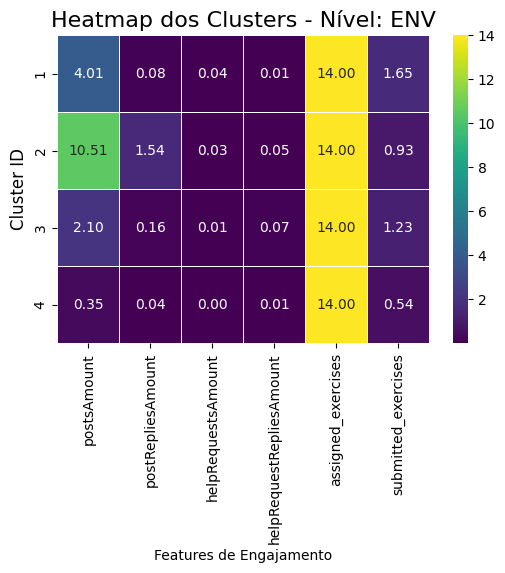

===== FIM DA ANÁLISE PARA O NÍVEL: 'ENV' =====

===== INICIANDO ANÁLISE PARA O NÍVEL: 'CRS' =====
Buscando informações do modelo: `analytics.modelo_engajamento_CRS`...
Realizando a despadronização dos centroides...

--- Médias das Variáveis Originais por Cluster (Nível: CRS) ---


feature,postsAmount,postRepliesAmount,helpRequestsAmount,helpRequestRepliesAmount,assigned_exercises,submitted_exercises
centroid_id,,,,,,
1,0.332456,0.041895,0.003642,0.005414,14.0,0.526516
2,3.617257,0.090689,0.044032,0.005926,14.0,1.411475
3,1.834453,0.220103,0.014974,0.066998,14.0,1.008430
4,3.746282,0.369249,0.003764,0.005414,14.0,1.647929


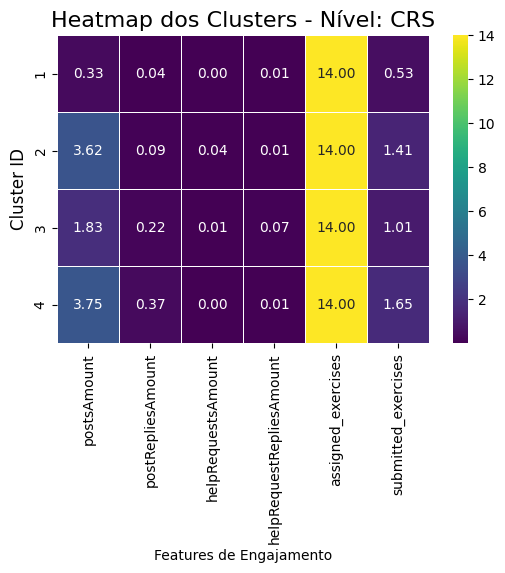

===== FIM DA ANÁLISE PARA O NÍVEL: 'CRS' =====

===== INICIANDO ANÁLISE PARA O NÍVEL: 'SPA' =====
Buscando informações do modelo: `analytics.modelo_engajamento_SPA`...
Realizando a despadronização dos centroides...

--- Médias das Variáveis Originais por Cluster (Nível: SPA) ---


feature,postsAmount,postRepliesAmount,helpRequestsAmount,helpRequestRepliesAmount,assigned_exercises,submitted_exercises
centroid_id,,,,,,
1,0.102644,0.011655,0.000909,0.001351,3.627587,0.145963
2,0.641006,0.137436,0.000938,0.001351,3.805334,0.306443
3,0.771259,0.030268,0.020462,0.004534,3.757975,0.307000
4,0.463764,0.084387,0.003791,0.032129,3.798655,0.244120


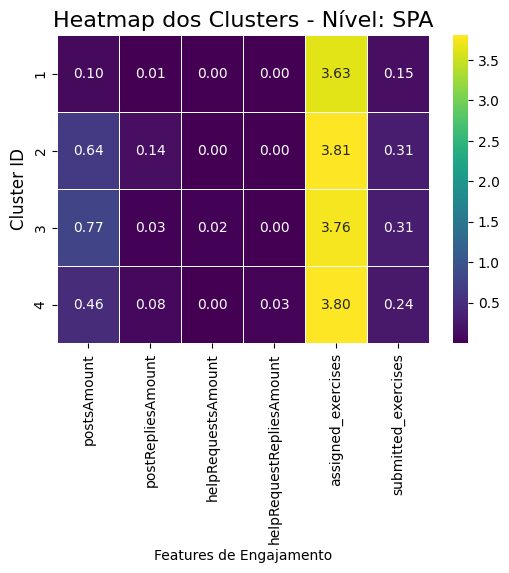

===== FIM DA ANÁLISE PARA O NÍVEL: 'SPA' =====

===== INICIANDO ANÁLISE PARA O NÍVEL: 'SUB' =====
Buscando informações do modelo: `analytics.modelo_engajamento_SUB`...
Realizando a despadronização dos centroides...

--- Médias das Variáveis Originais por Cluster (Nível: SUB) ---


feature,postsAmount,postRepliesAmount,helpRequestsAmount,helpRequestRepliesAmount,assigned_exercises,submitted_exercises
centroid_id,,,,,,
1,0.133780,0.025301,0.001240,0.015284,0.940259,0.062508
2,0.035457,0.003410,0.000227,0.000348,0.902331,0.048274
3,0.210752,0.008998,0.009855,0.002221,0.920595,0.071289
4,0.199020,0.061978,0.000227,0.000348,0.960416,0.078593


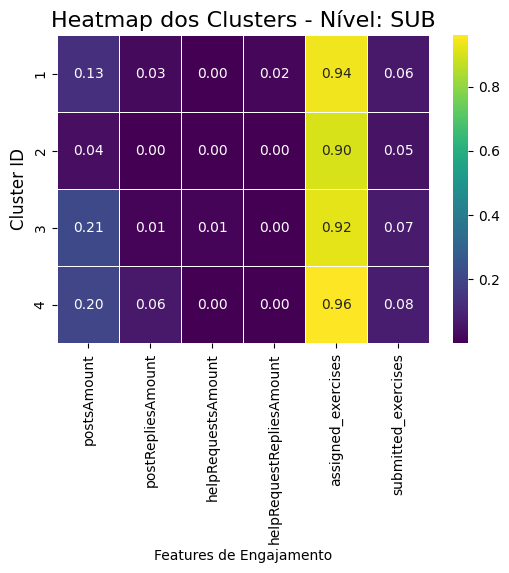

===== FIM DA ANÁLISE PARA O NÍVEL: 'SUB' =====

===== INICIANDO ANÁLISE PARA O NÍVEL: 'LEC' =====
Buscando informações do modelo: `analytics.modelo_engajamento_LEC`...
Realizando a despadronização dos centroides...

--- Médias das Variáveis Originais por Cluster (Nível: LEC) ---


feature,postsAmount,postRepliesAmount,helpRequestsAmount,helpRequestRepliesAmount,assigned_exercises,submitted_exercises
centroid_id,,,,,,
1,0.007995,0.000719,0.000045,0.000070,0.339602,0.064700
2,0.025133,0.001266,0.004027,0.001236,0.120938,0.008865
3,0.066801,0.001469,0.000045,0.000075,0.120938,0.008865
4,0.007988,0.000720,0.000045,0.000070,0.132345,0.008865


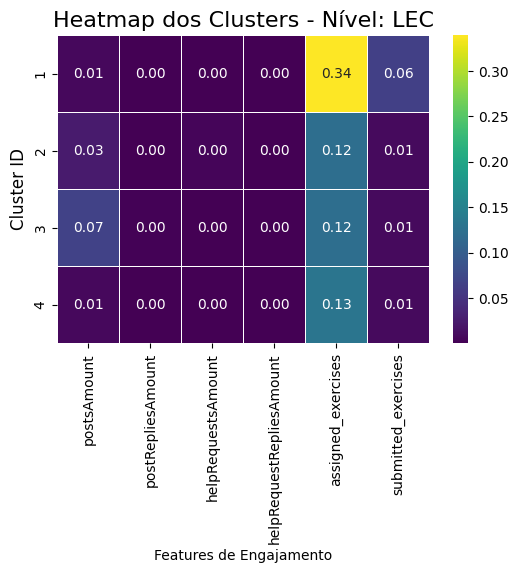

===== FIM DA ANÁLISE PARA O NÍVEL: 'LEC' =====

Análise concluída para todos os níveis.


In [19]:
# Itera sobre cada nível da hierarquia para analisar o modelo correspondente
for level in hierarchy:
    try:
        # =================================================================================
        # PASSO 2: ANALISAR O MODELO DE CADA NÍVEL
        # =================================================================================
        print(f"\n===== INICIANDO ANÁLISE PARA O NÍVEL: '{level}' =====")

        # Constrói dinamicamente o ID do modelo para o nível atual
        kmeans_model_id = f"analytics.modelo_engajamento_{level}"
        
        print(f"Buscando informações do modelo: `{kmeans_model_id}`...")

        # Buscar os centroides PADRONIZADOS
        centroids_std_query = f"""
        SELECT centroid_id, feature, numerical_value AS standardized_value
        FROM ML.CENTROIDS(MODEL `{kmeans_model_id}`)
        ORDER BY centroid_id, feature;
        """
        df_centroids_std = client.query(centroids_std_query).to_dataframe()

        # Buscar as informações das features para despadronizar
        feature_info_query = f"""
        SELECT input AS feature, mean, stddev
        FROM ML.FEATURE_INFO(MODEL `{kmeans_model_id}`);
        """
        df_feature_info = client.query(feature_info_query).to_dataframe()

        print("Realizando a despadronização dos centroides...")
        
        # Juntar as duas tabelas
        df_merged = pd.merge(df_centroids_std, df_feature_info, on='feature')

        # Reverter o escalonamento (Z-score) para a escala de LOG
        df_merged['log_scale_value'] = (df_merged['standardized_value'] * df_merged['stddev']) + df_merged['mean']

        # Pivotar a tabela
        df_centroids_log_scale = df_merged.pivot(
            index='centroid_id', columns='feature', values='log_scale_value'
        )

        # Garantir a ordem correta das colunas
        feature_order = df_feature_info['feature'].tolist()
        df_centroids_log_scale = df_centroids_log_scale[feature_order]

        # Reverter a transformação logarítmica para a escala original
        df_centroids_original_scale = df_centroids_log_scale.apply(np.expm1)

        # --- Saída Final da Iteração: Tabela de Médias e Heatmap ---
        print(f"\n--- Médias das Variáveis Originais por Cluster (Nível: {level}) ---")
        display(df_centroids_original_scale)

        plt.figure(figsize=(6, 4))
        sns.heatmap(
            df_centroids_original_scale,
            annot=True,
            fmt='.2f',
            cmap='viridis',
            linewidths=.5
        )
        # Título dinâmico para cada gráfico
        plt.title(f'Heatmap dos Clusters - Nível: {level}', fontsize=16)
        plt.ylabel('Cluster ID', fontsize=12)
        plt.xlabel('Features de Engajamento', fontsize=10)
        plt.show()

    except Exception as e:
        print(f"Ocorreu um erro ao analisar o modelo para o nível '{level}': {e}")
        print("Verifique se o modelo realmente existe ou se há algum problema com a query.")

    print(f"===== FIM DA ANÁLISE PARA O NÍVEL: '{level}' =====")

print("\nAnálise concluída para todos os níveis.")

In [24]:
# --- 0. Importações e Configurações Iniciais ---
import pandas as pd
import numpy as np
from google.cloud import bigquery
from datetime import date

# Garanta que o client e a lista hierarchy estão definidos
# client = bigquery.Client()
# hierarchy = ['ENV', 'CRS', 'SPA', 'SUB', 'LEC']

# Definindo a tabela de destino
destination_table_id = "viitra-redu.analytics.cubo_engajamento"

# =================================================================================
# PARTE 1: GERAÇÃO AUTOMÁTICA DOS LABELS
# =================================================================================
# (Esta parte do código permanece a mesma)
print("--- PARTE 1: Gerando Labels Automaticamente com Base nas Regras ---")

label_mapping = {}
ordered_labels = [
    'engajamento excelente', 
    'engajamento consistente', 
    'desempenho crítico', 
    'não interagem'
]

for level in hierarchy:
    try:
        print(f"\nAnalisando centroides do nível: '{level}'...")
        kmeans_model_id = f"analytics.modelo_engajamento_{level}"

        # Lógica de despadronização (sem alterações)
        centroids_std_query = f"SELECT centroid_id, feature, numerical_value FROM ML.CENTROIDS(MODEL `{kmeans_model_id}`)"
        df_centroids_std = client.query(centroids_std_query).to_dataframe()

        feature_info_query = f"SELECT input AS feature, mean, stddev FROM ML.FEATURE_INFO(MODEL `{kmeans_model_id}`)"
        df_feature_info = client.query(feature_info_query).to_dataframe()

        df_merged = pd.merge(df_centroids_std, df_feature_info, on='feature')
        df_merged['log_scale_value'] = (df_merged['numerical_value'] * df_merged['stddev']) + df_merged['mean']
        
        df_centroids_log_scale = df_merged.pivot(index='centroid_id', columns='feature', values='log_scale_value')
        
        df_centroids_original_scale = df_centroids_log_scale.apply(np.expm1)
        
        df_centroids_original_scale['engagement_score'] = (
            df_centroids_original_scale['postsAmount'] + df_centroids_original_scale['postRepliesAmount'] +
            df_centroids_original_scale['helpRequestsAmount'] + df_centroids_original_scale['helpRequestRepliesAmount'] +
            (df_centroids_original_scale['submitted_exercises'] * 1.5)
        )
        
        df_sorted = df_centroids_original_scale.sort_values('engagement_score', ascending=False)
        df_sorted['label'] = ordered_labels
        
        level_map = df_sorted['label'].to_dict()
        label_mapping[level] = level_map
        
        print(f"Mapeamento de labels para o nível '{level}' gerado com sucesso.")

    except Exception as e:
        print(f"!!! ERRO ao gerar labels para o nível '{level}': {e}")

print("\n--- Dicionário de Labels Gerado Automaticamente ---")
print(label_mapping)


# =================================================================================
# PARTE 2: PROCESSAMENTO E INSERÇÃO DIRETAMENTE NO BIGQUERY
# =================================================================================
print("\n--- PARTE 2: Processando e Inserindo Dados Nível por Nível no BigQuery ---")

print(f"Limpando a tabela de destino: `{destination_table_id}`...")
try:
    client.query(f"TRUNCATE TABLE `{destination_table_id}`").result()
    print("Tabela limpa com sucesso.")
except Exception as e:
    print(f"Não foi possível truncar a tabela (pode não existir ainda). Erro: {e}")


for level in hierarchy:
    print(f"\nProcessando nível: '{level}'...")
    
    current_level_map = label_mapping.get(level)
    if not current_level_map:
        print(f"!!! AVISO: Mapeamento de labels não encontrado para o nível '{level}'. Pulando este nível.")
        continue

    case_statement = "CASE centroid_id "
    for cluster_id, label in current_level_map.items():
        case_statement += f"WHEN {cluster_id} THEN '{label}' "
    case_statement += "ELSE 'Não Definido' END"

    kmeans_model_id = f"analytics.modelo_engajamento_{level}"
    
    # <<<<<<< MUDANÇA CRÍTICA AQUI >>>>>>>>>
    # As colunas data_inicio e data_fim agora são selecionadas da fonte, em vez de serem fixas.
    insert_query = f"""
    INSERT INTO `{destination_table_id}` (
        cliente, user_id, environment_id, course_id, space_id, subject_id, lecture_id,
        NivelAgregacao, user_name, environment_name, course_name, space_name, subject_name,
        lecture_name, data_inicio, data_fim, postsAmount, postRepliesAmount,
        helpRequestsAmount, helpRequestRepliesAmount, assigned_exercises, submitted_exercises,
        conclusion_percent, categoria_engajamento, data_classificacao
    )
    SELECT
        -- Seleção explícita de colunas da fonte e colunas calculadas
        cliente, user_id, environment_id, course_id, space_id, subject_id, lecture_id,
        '{level}' AS NivelAgregacao,
        user_name, environment_name, course_name, space_name, subject_name, lecture_name,
        period_start_date, -- Selecionado dinamicamente da função
        period_end_date,    -- Selecionado dinamicamente da função
        postsAmount, postRepliesAmount,
        helpRequestsAmount, helpRequestRepliesAmount, assigned_exercises, submitted_exercises,
        SAFE_DIVIDE(submitted_exercises, assigned_exercises) AS conclusion_percent,
        {case_statement} AS categoria_engajamento,
        DATE('{date.today().isoformat()}') AS data_classificacao
    FROM (
      -- A subquery de predição fornece todas as colunas da função, incluindo as datas
      SELECT
        * EXCEPT(centroid_id),
        centroid_id
      FROM
        ML.PREDICT(
          MODEL `{kmeans_model_id}`,
          (
            SELECT 
                eng.*
            FROM analytics.fn_engajamento(DATE('2020-01-01'), DATE('2021-12-31'), TRUE, 'redu-digital', NULL, NULL, NULL, NULL, NULL, '{level}', 'QUARTER') AS eng
            INNER JOIN replicas.user_environment_associations AS filtro ON eng.cliente = filtro.cliente AND eng.user_id = filtro.user_id
            WHERE filtro.role NOT IN ('teacher', 'tutor', 'environment_admin')
          )
        )
    )
    """
    
    try:
        print(f"Executando job de inserção para o nível '{level}'. Isso pode levar algum tempo...")
        job = client.query(insert_query)
        job.result()
        print(f"Nível '{level}' inserido com sucesso na tabela de destino.")
    except Exception as e:
        print(f"!!! ERRO ao processar e inserir o nível '{level}': {e}")

print("\nProcesso concluído!")

--- PARTE 1: Gerando Labels Automaticamente com Base nas Regras ---

Analisando centroides do nível: 'ENV'...
Mapeamento de labels para o nível 'ENV' gerado com sucesso.

Analisando centroides do nível: 'CRS'...
Mapeamento de labels para o nível 'CRS' gerado com sucesso.

Analisando centroides do nível: 'SPA'...
Mapeamento de labels para o nível 'SPA' gerado com sucesso.

Analisando centroides do nível: 'SUB'...
Mapeamento de labels para o nível 'SUB' gerado com sucesso.

Analisando centroides do nível: 'LEC'...
Mapeamento de labels para o nível 'LEC' gerado com sucesso.

--- Dicionário de Labels Gerado Automaticamente ---
{'ENV': {2: 'engajamento excelente', 1: 'engajamento consistente', 3: 'desempenho crítico', 4: 'não interagem'}, 'CRS': {4: 'engajamento excelente', 2: 'engajamento consistente', 3: 'desempenho crítico', 1: 'não interagem'}, 'SPA': {3: 'engajamento excelente', 2: 'engajamento consistente', 4: 'desempenho crítico', 1: 'não interagem'}, 'SUB': {4: 'engajamento excelent